In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from scipy.optimize import curve_fit
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.grid'] = False
plt.style.context('Solarize_Light2')

In [30]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_outs(outs):
    return np.array([np.std(outs[i*512:(i+1)*512]) for i in range(num_temps)])

num_temps = 100
markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

### Ising on square lattice

$\mathcal{H}=-\sum\limits_{x,y=1}^{L}\left[J_1\sigma_{x,y}\cdot\sigma_{x+1,y}+J_2\sigma_{x,y}\cdot\sigma_{x,y+1}\right]$
 \
 \
$M = \dfrac{J_2}{J_1}$, $J_1 = 1.0$, $J_2 \in [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0]$ \
\
Exact solution: \
\
$\sinh{\dfrac{2J_1}{kT_c}}\cdot\sinh{\dfrac{2J_2}{kT_c}}=1$

In [86]:
M = 1.0

num_temps = 100
num_epochs = 3
with open('ts_crit_sq.pkl', 'rb') as f:
    get_crit_T = pickle.load(f)
    
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

outs_ = []
Ls = [20, 30, 60, 80, 100]

for i, L in enumerate(Ls):
    with open(f'data_outputs/square/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

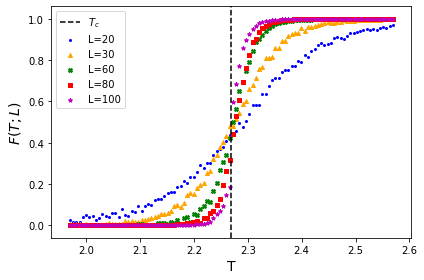

In [87]:
for i, L in enumerate(Ls):
    plt.scatter(T, errs(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.xlabel('T', fontsize=14)
    # plt.ylabel('$F(T;L)$', rotation='horizontal', labelpad=10.0, fontsize=12)
    plt.ylabel('$F(T;L)$', fontsize=14)
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/sq-{M}-F.png')

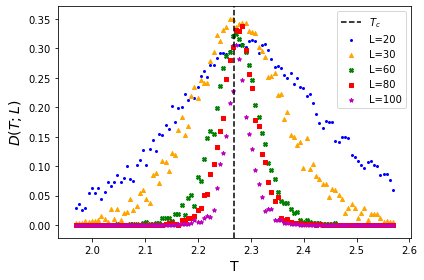

In [88]:
def gaussian(x, amp, mu, sigma):
    return (amp/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2 / (2*sigma**2))

threshold = [0.1, 0.1, 0.05, 0.05, 0.01]

data = [stds_err(outs_[j][:, 0])[stds_err(outs_[j][:, 0]) > threshold[j]] for j in range(len(Ls))]
temp = [T[stds_err(outs_[j][:, 0]) > threshold[j]] for j in range(len(Ls))]

with open(f'var_params/square/popt_{M}.npy', 'rb') as f:
    popt_ = np.load(f)

for i, L in enumerate(Ls):
    plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # plt.plot(temp[i], gaussian(temp[i], popt_[i][0], popt_[i][1], popt_[i][2]), c=colors[i])
    plt.xlabel('T', fontsize=14)
    # plt.ylabel('$D(T;L)$', rotation='horizontal', labelpad=10.0, fontsize=12)
    plt.ylabel('$D(T;L)$', fontsize=14)
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/sq-{M}-D.png')

### Ising on triangular lattice

$\mathcal{H}=-\sum\limits_{x,y=1}^{L}\left[J\sigma_{x,y}(\sigma_{x+1,y}+\sigma_{x,y+1})+J_d \sigma_{x,y}\sigma_{x+1,y+1}\right]$
 \
 \
$J = 1.0$, $J_d \in [-0.7, 0.0]$ with step $0.1$ \
\
Exact solution: \
\
$\left(\sinh{\dfrac{2J}{k_B T_c}}\right)^2+2\sinh{\dfrac{2J}{k_B T_c}}\sinh{\dfrac{2J_d}{k_B T_c}}=1  $

In [37]:
Jd = -0.2

with open('ts_crit_tr.pkl', 'rb') as f:
    get_crit_T = pickle.load(f)

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

# opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
# epochs = opt_epochs[Jd]

Ls = [20, 30, 60, 80, 120]
outs_ = []

num_epochs = 3

for i, L in enumerate(Ls):
    # num_epochs = epochs[i]
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))
        
markers=['.', '^', 'X', 's', '*', 'p']
colors=['blue', 'orange', 'green', 'red', 'm', 'gold']

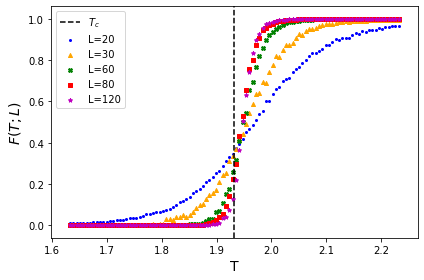

In [38]:
for i, L in enumerate(Ls):
    plt.scatter(T, errs(outs_[i]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    plt.xlabel('T', fontsize=14)
    # plt.ylabel('$F(T;L)$', rotation='horizontal', labelpad=10.0, fontsize=12)
    plt.ylabel('$F(T;L)$', fontsize=14)
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/tr-{Jd}-F.png')

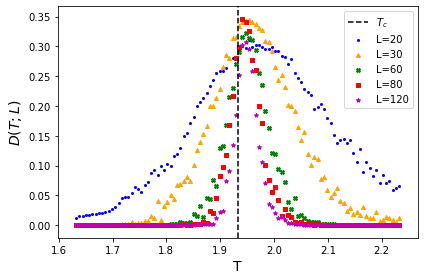

In [39]:
def gaussian(x, amp, mu, sigma):
    return (amp/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2 / (2*sigma**2))

threshold = [0.1, 0.1, 0.05, 0.05, 0.01]

data = [stds_outs(outs_[j])[stds_outs(outs_[j]) > threshold[j]] for j in range(len(Ls))]
temp = [T[stds_outs(outs_[j]) > threshold[j]] for j in range(len(Ls))]

with open(f'var_params/triangular/popt_{Jd}.npy', 'rb') as f:
    popt_ = np.load(f)

for i, L in enumerate(Ls):
    plt.scatter(T, stds_outs(outs_[i]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # plt.plot(temp[i], gaussian(temp[i], popt_[i][0], popt_[i][1], popt_[i][2]), c=colors[i])
    plt.xlabel('T', fontsize=14)
    # plt.ylabel('$D(T;L)$', rotation='horizontal', labelpad=10.0, fontsize=12)
    plt.ylabel('$D(T;L)$', fontsize=14)
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/tr-{Jd}-D.png')